In [1]:
# Proyecto_SBV_Micromonosporaceae_families

# Importación de bibliotecas 

import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


In [2]:
# Lectura de acrchivo y creación de dataframe

Micro_fam = pd.read_csv ('Actinobacterias.csv', sep ='\t')

Micro_fam


,#Genus,Species,Strain,NCBI accession,From,To,BGC type,On contig edge,Most similar known cluster,Similarity in %,MIBiG BGC-ID,Results URL
0,Actinoplanes,globisporus,DSM 43857,NZ_KB903294.1,839401,873277,napaa,False,ε-Poly-L-lysine,100,BGC0002174,https://antismash-db.secondarymetabolites.org/...
1,Actinoplanes,globisporus,DSM 43857,NZ_KB903294.1,992045,1048847,hgle-ks nrps indole hybrid,False,fortimicin,13,BGC0000695,https://antismash-db.secondarymetabolites.org/...
2,Actinoplanes,globisporus,DSM 43857,NZ_KB903294.1,1514471,1525296,ripp-like,False,lymphostin/neolymphostinol B/lymphostinol/neol...,33,BGC0001006,https://antismash-db.secondarymetabolites.org/...
3,Actinoplanes,globisporus,DSM 43857,NZ_KB903301.1,56858,78888,redox-cofactor,False,lankacidin C,20,BGC0001100,https://antismash-db.secondarymetabolites.org/...
4,Actinoplanes,globisporus,DSM 43857,NZ_KB903306.1,400667,441735,t3pks,False,loseolamycin A1/loseolamycin A2,56,BGC0002362,https://antismash-db.secondarymetabolites.org/...
...,...,...,...,...,...,...,...,...,...,...,...,...
3167,Myceligenerans,Unknown,XHU 5031,NZ_JAFMPK010000047.1,0,25340,nrps-like,True,NaN,0,NaN,https://antismash-db.secondarymetabolites.org/...
3168,Myceligenerans,Unknown,XHU 5031,NZ_JAFMPK010000047.1,170624,203433,ectoine thiopeptide hybrid,False,ectoine,100,BGC0002052,https://antismash-db.secondarymetabolites.org/...
3169,Myceligenerans,Unknown,XHU 5031,NZ_JAFMPK010000047.1,204935,235524,ni-siderophore,False,FW0622,37,BGC0002690,https://antismash-db.secondarymetabolites.org/...
3170,Myceligenerans,Unknown,XHU 5031,NZ_JAFMPK010000047.1,420633,461746,t3pks,False,alkylresorcinol,100,BGC0000282,https://antismash-db.secondarymetabolites.org/...


In [3]:
# Análisis exploratorio general

# Agrupación de los datos por familas y tipos de BGC

#Generación de ocurrencias de cada tipo de BGC por género

occurrences = Micro_fam.groupby(["#Genus", "BGC type"]).size().reset_index(name="Occurrences")

# Guardar en un nuevo archivo CSV
occurrences.to_csv('BGC_por_género.csv', index=False)

print("Los datos han sido guardados en BGC_por_género.csv")

occurrences

Los datos han sido guardados en BGC_por_género.csv


,#Genus,BGC type,Occurrences
0,Actinocatenispora,ectoine,2
1,Actinocatenispora,hydrogen-cyanide,5
2,Actinocatenispora,indole,2
3,Actinocatenispora,lanthipeptide-class-ii,1
4,Actinocatenispora,lap thioamitides hybrid,1
...,...,...,...
881,Xylanimonas,lassopeptide,1
882,Xylanimonas,napaa,1
883,Xylanimonas,ni-siderophore,1
884,Xylanimonas,nrp-metallophore nrps hybrid,1


La gráfica se ha guardado en actinobacterias_heatmap.pdf


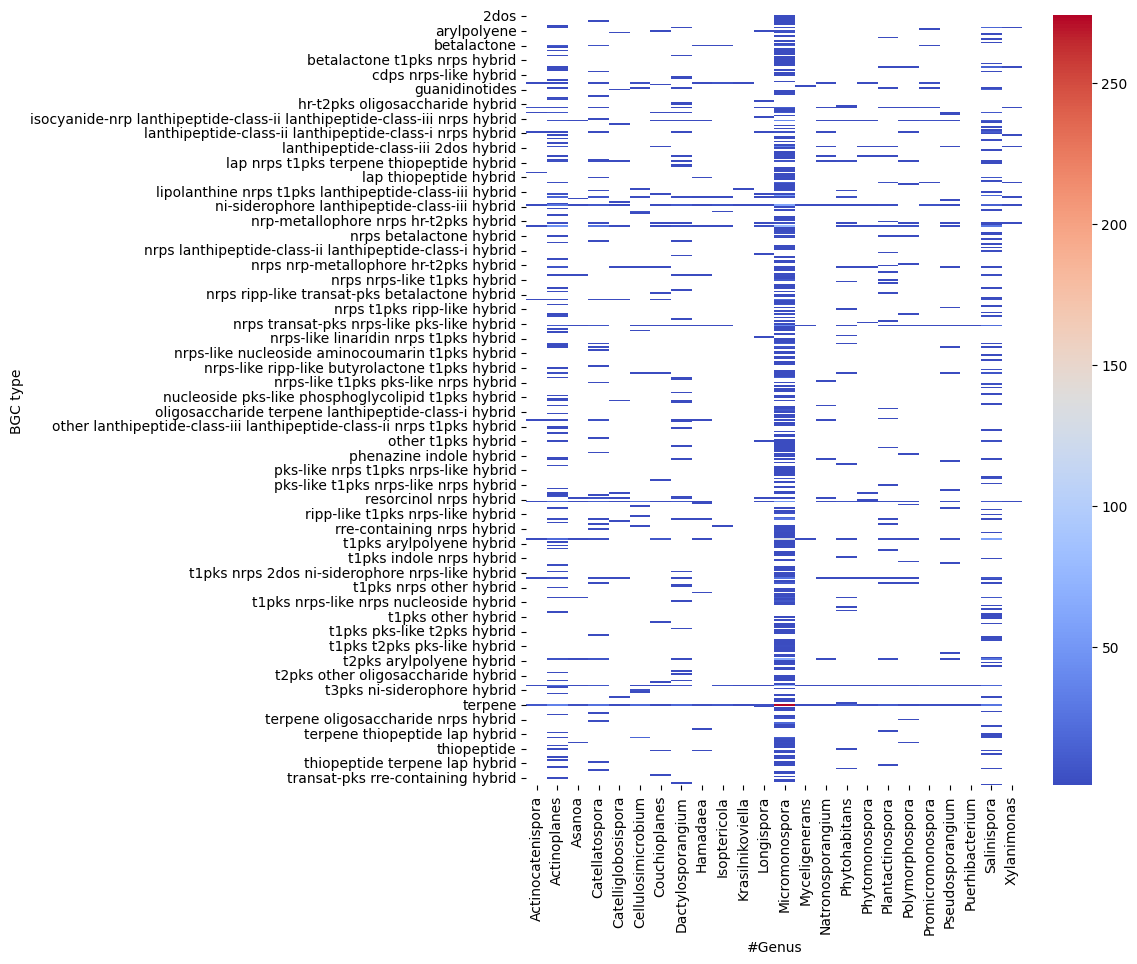

In [16]:
# Construccion de la grafica de calor para visulaizar los BGC por familia para identificar los géneros de interés y su potencial bisintético
pivot = occurrences.pivot(index="BGC type", columns="#Genus", values="Occurrences")
plt.figure(figsize=(8, 10))
sns.heatmap(pivot, cmap="coolwarm")

# Guardar la gráfica en un archivo PDF
plt.savefig("actinobacterias_heatmap.pdf", format="pdf", bbox_inches="tight")
print("La gráfica se ha guardado en actinobacterias_heatmap.pdf")
plt.show()


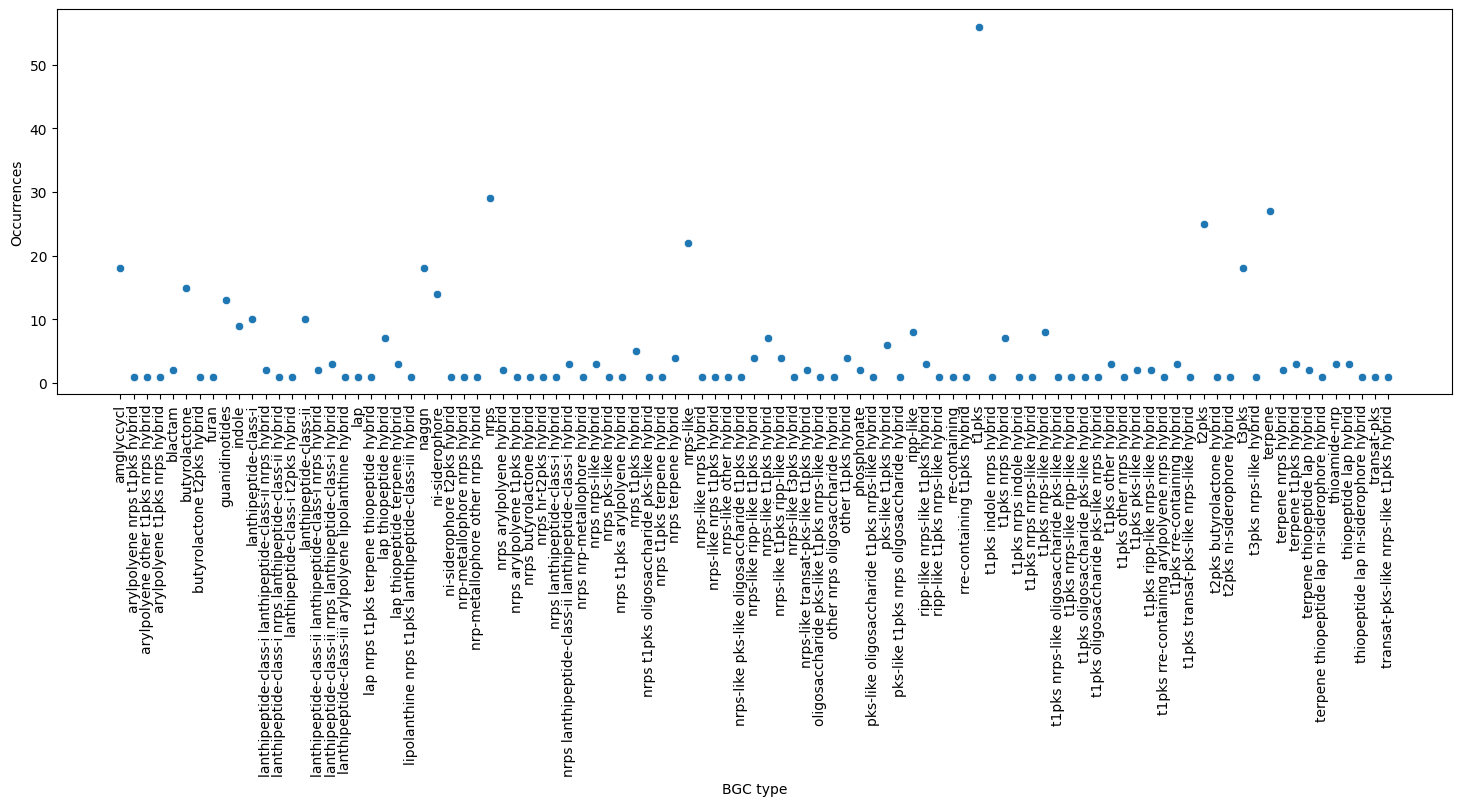

In [4]:
# Construcción de gráfica y filtración de datos para la obtención de BGC por cada género 
Salinispora = occurrences.loc[occurrences["#Genus"] == "Salinispora"]
plt.figure(figsize=(18, 5))
sns.scatterplot(Salinispora, x="BGC type", y="Occurrences")
plt.xticks(rotation="vertical")
plt.show()

In [4]:
pip install colorama

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Código para análisis particular para el usuario

# Para probar este código con NCBI accession se sugiere revisar el documento Actinobacterias.csv para obyener ejemplos de NCBI accession number 

# Colorama 

import colorama
from colorama import Fore, Style

# Colores para los BGC types
bgc_colors = {
    'ni-siderophore': Fore.RED + Style.BRIGHT ,
    'lanthipeptide-class-i': Fore.YELLOW + Style.BRIGHT,
    'lanthipeptide-class-ii': Fore.YELLOW + Style.BRIGHT,
    'lassopeptide': Fore.YELLOW + Style.BRIGHT,
    'nrps': Fore.GREEN + Style.BRIGHT,
    'terpene': Fore.MAGENTA + Style.BRIGHT,
    't1pks': Fore.BLUE + Style.BRIGHT,
    't2pks': Fore.BLUE + Style.BRIGHT,
    't3pks': Fore.BLUE + Style.BRIGHT,
    'betalactone': Fore.CYAN + Style.BRIGHT,
    
}
def datos():
    return pd.read_csv('Actinobacterias.csv', sep='\t')
    
def mostrar_tabla_bgc(df, columna, valor):
    # Mostrar una tabla con la información filtrada por tipo de BGC o número de acceso NCBI
    filtered_df = df[df[columna] == valor]

    if columna == 'NCBI accession':
        print(80 * chr(0x2015))
        print("                 Número de referencia NCBI")
        print(80 * chr(0x2015))
        
        for _, row in filtered_df.iterrows():
            # Obtener el color del tipo de BGC si existe en el diccionario
            bgc_type = row['BGC type']
            color = bgc_colors.get(bgc_type, Fore.RESET)  # Usa Fore.RESET si el tipo no está en bgc_colors

            # Imprimir cada campo con el color aplicable al tipo de BGC
            print(f"{'Género:':<20} {row['#Genus']}")
            print(f"{'Especie:':<20} {row['Species']}")
            print(f"{'Cepa:':<20} {row['Strain']}")
            print(f"{'Tipo de BGC:':<20} {color}{bgc_type}{Style.RESET_ALL}")
            print(f"{'Similitud con clúster conocido:':<20} {row['Most similar known cluster']}")
            print(f"{'Similitud en %:':<20} {row['Similarity in %']}")
            print(f"{'MIBIG_BGC_ID:':<20} {row['MIBiG BGC-ID']}")
            print(80 * chr(0x2015))

    elif columna == 'BGC type':
        
        # Crear histograma de ocurrencias por tipo de BGC
        #Leer el archivo CSV
        data = Micro_fam
        # Preguntar al usuario por el tipo de BGC que desea analizar
        bgc_type = valor

        # Filtrar datos en función del tipo de BGC
        bgc_data = data[data["BGC type"] == bgc_type]

        # Calcular ocurrencias de cada género en función del tipo de BGC
        occurrences = bgc_data.groupby("#Genus").size().reset_index(name='Occurrences')

        # Colores para los BGC types
        color_palette = {
            'ni-siderophore': 'red',
            'lanthipeptide-class-i': 'yellow',
            'lanthipeptide-class-ii': 'yellow',
            'lassopeptide': 'yellow',
            'nrps': 'green',
            'terpene': 'purple',
            't1pks': 'blue',
            't2pks':'blue',
            't3pks': 'blue',
            'betalactone': 'cyan'
        }

        # Seleccionar el color adecuado para el BGC
        color = color_palette.get(bgc_type, 'gray')  # usa 'gray' si el tipo de BGC no tiene color asignado

        # Crear el histograma
        plt.figure(figsize=(18, 6))
        sns.barplot(data=occurrences, x="#Genus", y="Occurrences", color=color)
        plt.xlabel("Género")
        plt.ylabel("Frecuencia de Ocurrencias")
        plt.title(f"Histograma de Ocurrencias de {bgc_type} por Género")
        plt.xticks(rotation=45)  # Rotar los nombres de los géneros si son largos
        plt.tight_layout()
        plt.show()
       
         
def obtener_datos_entrada():
    #Obtener la columna y el valor de búsqueda de entrada
    columna = input("¿Qué deseas buscar? (NCBI accession o BGC type): ").strip()
    valor = input(f"Introduce el valor de {columna}: ").strip()
    return columna, valor

def main():
    #Función principal que maneja la entrada
    # Cargar los datos
    df = datos()

    # Preguntar al usuario por el tipo de búsqueda
    columna, valor = obtener_datos_entrada()

    # Validar que la columna ingresada sea válida
    if columna not in ['NCBI accession', 'BGC type']:
        print(Fore.RED + "Columna inválida. Elige entre 'NCBI accession' o 'BGC type'.")
        return

    # Mostrar los resultados
    mostrar_tabla_bgc(df, columna, valor)

if __name__ == "__main__":
    main()

¿Qué deseas buscar? (NCBI accession o BGC type):  NCBI accession
Introduce el valor de NCBI accession:  NZ_CP023865.1


――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
                 Número de referencia NCBI
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Género:              Actinoplanes
Especie:             teichomyceticus
Cepa:                ATCC 31121
Tipo de BGC:         terpene
Similitud con clúster conocido: isorenieratene
Similitud en %:      42
MIBIG_BGC_ID:        BGC0000664
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Género:              Actinoplanes
Especie:             teichomyceticus
Cepa:                ATCC 31121
Tipo de BGC:         ripp-like
Similitud con clúster conocido: aureonuclemycin
Similitud en %:      9
MIBIG_BGC_ID:        BGC0002461
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Género:              Actinoplanes
Especie:             teichomyceticus
Cepa:                ATCC 31121
Tipo de BGC:         indole
Similitud con clúster conocido

¿Qué deseas buscar? (NCBI accession o BGC type):  BGC type
Introduce el valor de BGC type:  nrps


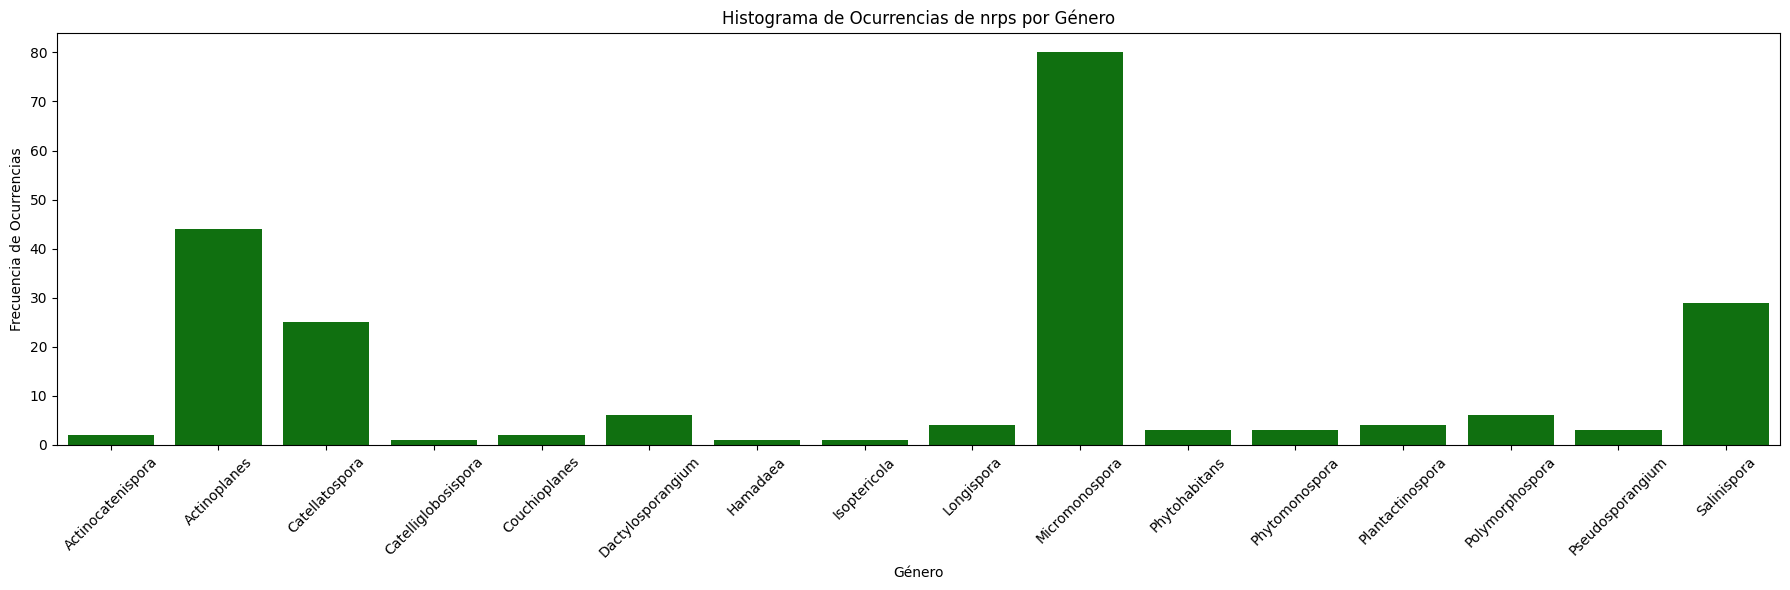

In [15]:
# Duplicado del código anterior para probar la generación del histograma al entrar un tipo de BGC por el usuario

# Puden probarse los typos de BGC definidos en color_palette

# Colorama 

import colorama
from colorama import Fore, Style

# Colores para los BGC types
bgc_colors = {
    'ni-siderophore': Fore.RED + Style.BRIGHT ,
    'lanthipeptide-class-i': Fore.YELLOW + Style.BRIGHT,
    'lanthipeptide-class-ii': Fore.YELLOW + Style.BRIGHT,
    'lassopeptide': Fore.YELLOW + Style.BRIGHT,
    'nrps': Fore.GREEN + Style.BRIGHT,
    'terpene': Fore.MAGENTA + Style.BRIGHT,
    't1pks': Fore.BLUE + Style.BRIGHT,
    't2pks': Fore.BLUE + Style.BRIGHT,
    't3pks': Fore.BLUE + Style.BRIGHT,
    'betalactone': Fore.CYAN + Style.BRIGHT,
    
}
def datos():
    return pd.read_csv('Actinobacterias.csv', sep='\t')
    
def mostrar_tabla_bgc(df, columna, valor):
    # Mostrar una tabla con la información filtrada por tipo de BGC o número de acceso NCBI
    filtered_df = df[df[columna] == valor]

    if columna == 'NCBI accession':
        print(80 * chr(0x2015))
        print("                 Número de referencia NCBI")
        print(80 * chr(0x2015))
        
        for _, row in filtered_df.iterrows():
            # Obtener el color del tipo de BGC si existe en el diccionario
            bgc_type = row['BGC type']
            color = bgc_colors.get(bgc_type, Fore.RESET)  # Usa Fore.RESET si el tipo no está en bgc_colors

            # Imprimir cada campo con el color aplicable al tipo de BGC
            print(f"{'Género:':<20} {row['#Genus']}")
            print(f"{'Especie:':<20} {row['Species']}")
            print(f"{'Cepa:':<20} {row['Strain']}")
            print(f"{'Tipo de BGC:':<20} {color}{bgc_type}{Style.RESET_ALL}")
            print(f"{'Similitud con clúster conocido:':<20} {row['Most similar known cluster']}")
            print(f"{'Similitud en %:':<20} {row['Similarity in %']}")
            print(f"{'MIBIG_BGC_ID:':<20} {row['MIBiG BGC-ID']}")
            print(80 * chr(0x2015))

    elif columna == 'BGC type':
        
        # Crear histograma de ocurrencias por tipo de BGC
        #Leer el archivo CSV
        data = Micro_fam
        # Preguntar al usuario por el tipo de BGC que desea analizar
        bgc_type = valor

        # Filtrar datos en función del tipo de BGC
        bgc_data = data[data["BGC type"] == bgc_type]

        # Calcular ocurrencias de cada género en función del tipo de BGC
        occurrences = bgc_data.groupby("#Genus").size().reset_index(name='Occurrences')

        # Colores para los BGC types
        color_palette = {
            'ni-siderophore': 'red',
            'lanthipeptide-class-i': 'yellow',
            'lanthipeptide-class-ii': 'yellow',
            'lassopeptide': 'yellow',
            'nrps': 'green',
            'terpene': 'purple',
            't1pks': 'blue',
            't2pks':'blue',
            't3pks': 'blue',
            'betalactone': 'cyan'
        }

        # Seleccionar el color adecuado para el BGC
        color = color_palette.get(bgc_type, 'gray')  # usa 'gray' si el tipo de BGC no tiene color asignado

        # Crear el histograma
        plt.figure(figsize=(18, 6))
        sns.barplot(data=occurrences, x="#Genus", y="Occurrences", color=color)
        plt.xlabel("Género")
        plt.ylabel("Frecuencia de Ocurrencias")
        plt.title(f"Histograma de Ocurrencias de {bgc_type} por Género")
        plt.xticks(rotation=45)  # Rotar los nombres de los géneros si son largos
        plt.tight_layout()
        plt.show()
       
         
def obtener_datos_entrada():
    #Obtener la columna y el valor de búsqueda de entrada
    columna = input("¿Qué deseas buscar? (NCBI accession o BGC type): ").strip()
    valor = input(f"Introduce el valor de {columna}: ").strip()
    return columna, valor

def main():
    #Función principal que maneja la entrada
    # Cargar los datos
    df = datos()

    # Preguntar al usuario por el tipo de búsqueda
    columna, valor = obtener_datos_entrada()

    # Validar que la columna ingresada sea válida
    if columna not in ['NCBI accession', 'BGC type']:
        print(Fore.RED + "Columna inválida. Elige entre 'NCBI accession' o 'BGC type'.")
        return

    # Mostrar los resultados
    mostrar_tabla_bgc(df, columna, valor)

if __name__ == "__main__":
    main()

# I